# Predictive Models
# Cory Lowe
# Assignment 2 - Full

# Importing the Data

# Assignment 2

Task: 

1)	Preprocess and EDA data as needed. Don’t just do EDA, discuss what it tell you about the data and how it informs you in different decisions you make about the below models. 

2)	Run and tune at least the below methods. You will create several different tuning of each. Like KNN-3 AND KNN-5, using different distance measurements, Or SVM with kernels, cost functions and gammas, OR Random Forest with different "trys". Report your best tuned model for each. Don’t forget to CV. If you just did three tunings per model, you would be trying 36 different models on this dataset. That is probably a minimum. Grid search is your friend, but also your enemy if you ask it to search through too much. This is a great way to learn how to balance the two. 

In [1]:
%pwd
path = "C:/Users/corylowe/OneDrive/Rockhurst/Predictive Models/Assignment 2 - Full"

# The Census Data Has Been Imported

In [2]:
import pandas as pd
import os
os.chdir(path)

Income=pd.read_csv(path + "/data/Census Income.csv", encoding = "ISO-8859-1")
Income
Income.shape
Income.head(10)

,income,age,workClass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,<=50K,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,<=50K,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,>50K,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,>50K,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,>50K,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


#### Source: https://archive.ics.uci.edu/ml/datasets/Adult
#### I copied the data into a CSV and moved the income (predictor variable) to the left hand side, which will make writing the code easier.

# I Am Dropping the Weighting Variable

In [3]:
del Income["fnlwgt"]
Income.head(10)

,income,age,workClass,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,<=50K,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,<=50K,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,<=50K,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,>50K,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,>50K,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,>50K,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


#### The census bureau weights classes of individuals based on how well they are represented in the survey. I removed these weights as we might not have access to this data on future cases. I don't want to create a situation where the models can't be run becasuse independent variables are missing. In a real scenario, I would investiage to determine if we would have this data.
#### Source: https://www.census.gov/programs-surveys/sipp/methodology/weighting.html

# I created excel pivot tables of each variable and found the following variables have missing values.
-  Working Class
-  Occupation
-  Native Country

#### Therefore, I am replacing these missing values with the most common value.

# I Am Dropping the Education Variable

In [4]:
del Income["education"]

#### The education and education number are 2 ways of measuring the same thing.
#### Only one variable should be in the model to prevent multi-colinearity.

# Bar Plots showing N/A values

#### Working class showing N/A values

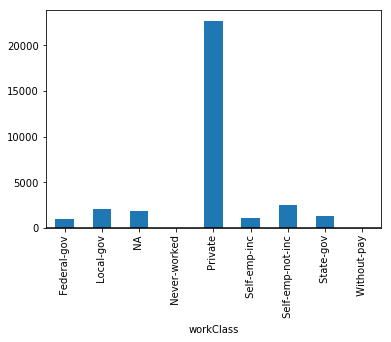

In [5]:
import matplotlib.pyplot as plt

groupby = Income.groupby("workClass")
groupByEDA=groupby["workClass"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

#### Occupation class showing N/A values

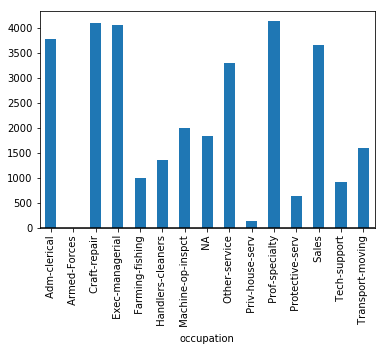

In [7]:
import matplotlib.pyplot as plt

groupby = Income.groupby("occupation")
groupByEDA=groupby["occupation"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

####  Native country showing N/A values
#### Hint - They are in alphabetical order

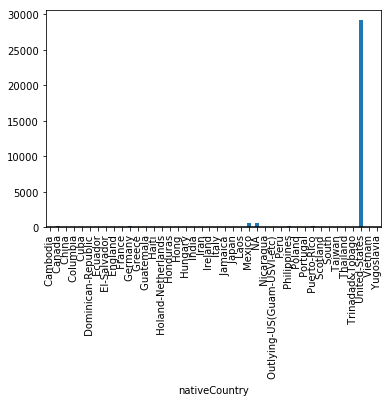

In [8]:
import matplotlib.pyplot as plt

groupby = Income.groupby("nativeCountry")
groupByEDA=groupby["nativeCountry"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

#### Replacing working class N/As with most popular category (private)

In [9]:
Income['workClass'] = Income['workClass'].str.replace('NA', 'Private')

 Bar Plot of Working Class With N/As Replaced

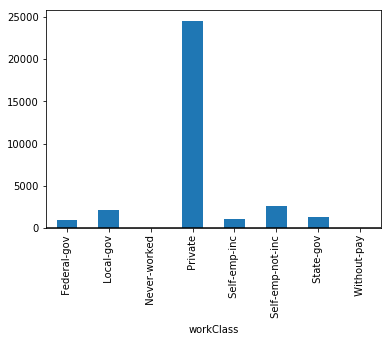

In [10]:

import matplotlib.pyplot as plt

groupby = Income.groupby("workClass")
groupByEDA=groupby["workClass"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

#### Replacing professional N/As with most popular category (private)

In [11]:
Income['occupation'] = Income['occupation'].str.replace('NA', ' Prof-specialty')

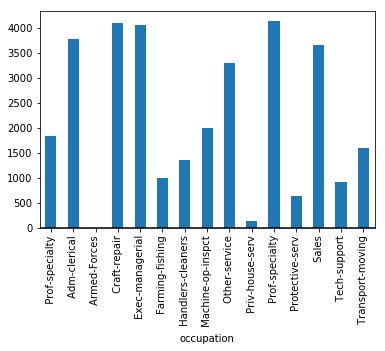

In [12]:
import matplotlib.pyplot as plt

groupby = Income.groupby("occupation")
groupByEDA=groupby["occupation"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

#### Replacing country N/As with most popular category (United States)

In [13]:
Income['nativeCountry'] = Income['nativeCountry'].str.replace('NA', 'United-States')

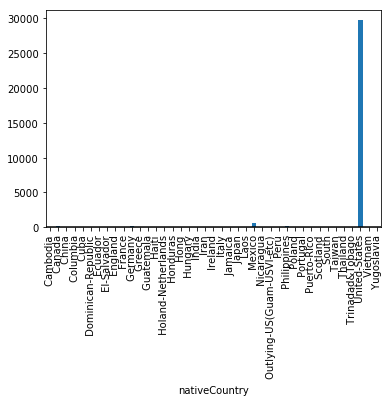

In [14]:
import matplotlib.pyplot as plt

groupby = Income.groupby("nativeCountry")
groupByEDA=groupby["nativeCountry"].aggregate(len)
plt.figure()
groupByEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
plt.show()

# Transforming Categorical Variables Into Dummy Variables

In [15]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['workClass']))
Name_Dummy.columns
Income[' Federal-gov']=Name_Dummy[' Federal-gov']
Income[' Local-gov']=Name_Dummy[' Local-gov']
Income[' Never-worked']=Name_Dummy[' Never-worked']
Income[' Private']=Name_Dummy[' Private']
Income[' Self-emp-inc']=Name_Dummy[' Self-emp-inc']
Income[' Self-emp-not-inc']=Name_Dummy[' Self-emp-not-inc']
Income[' State-gov']=Name_Dummy[' State-gov']
Income[' Without-pay']=Name_Dummy[' Without-pay']                                 

In [16]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['maritalStatus']))
Name_Dummy.columns
Income[' Divorced']=Name_Dummy[' Divorced']
Income[' Married-AF-spouse']=Name_Dummy[' Married-AF-spouse']
Income[' Married-civ-spouse']=Name_Dummy[' Married-civ-spouse']
Income[' Married-spouse-absent']=Name_Dummy[' Married-spouse-absent']
Income[' Never-married']=Name_Dummy[' Never-married']
Income[' Separated']=Name_Dummy[' Separated']
Income[' Widowed']=Name_Dummy[' Widowed']

In [17]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['occupation']))
Name_Dummy.columns
Income[' Exec-managerial']=Name_Dummy[' Exec-managerial']
Income[' Farming-fishing']=Name_Dummy[' Farming-fishing']
Income[' Handlers-cleaners']=Name_Dummy[' Handlers-cleaners']
Income[' Machine-op-inspct']=Name_Dummy[' Machine-op-inspct']
Income[' Other-service']=Name_Dummy[' Other-service']
Income[' Prof-specialty']=Name_Dummy[' Prof-specialty']
Income[' Protective-serv']=Name_Dummy[' Protective-serv']
Income[' Sales']=Name_Dummy[' Sales']
Income[' Tech-support']=Name_Dummy[' Tech-support']
Income[' Transport-moving']=Name_Dummy[' Transport-moving']

In [18]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['relationship']))
Name_Dummy.columns
Income[' Own-child']=Name_Dummy[' Own-child']
Income[' Unmarried']=Name_Dummy[' Unmarried']
Income[' Wife']=Name_Dummy[' Wife']

In [19]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['race']))
Name_Dummy.columns
Income[' Other']=Name_Dummy[' Other']
Income[' White']=Name_Dummy[' White']

In [20]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['sex']))
Name_Dummy.columns
Income[' Female']=Name_Dummy[' Female']
Income[' Male']=Name_Dummy[' Male']

In [21]:
Name_Dummy=pd.DataFrame(pd.get_dummies(Income['nativeCountry']))
Name_Dummy.columns
Income[' Cambodia']=Name_Dummy[' Cambodia']
Income[' Canada']=Name_Dummy[' Canada']
Income[' China']=Name_Dummy[' China']
Income[' Columbia']=Name_Dummy[' Columbia']
Income[' Cuba']=Name_Dummy[' Cuba']
Income[' Dominican-Republic']=Name_Dummy[' Dominican-Republic']
Income[' Ecuador']=Name_Dummy[' Ecuador']
Income[' El-Salvador']=Name_Dummy[' El-Salvador']
Income[' England']=Name_Dummy[' England']
Income[' France']=Name_Dummy[' France']
Income[' Germany']=Name_Dummy[' Germany']
Income[' Greece']=Name_Dummy[' Greece']
Income[' Guatemala']=Name_Dummy[' Guatemala']
Income[' Haiti']=Name_Dummy[' Haiti']
Income[' Holand-Netherlands']=Name_Dummy[' Holand-Netherlands']
Income[' Honduras']=Name_Dummy[' Honduras']
Income[' Hong']=Name_Dummy[' Hong']
Income[' Hungary']=Name_Dummy[' Hungary']
Income[' India']=Name_Dummy[' India']
Income[' Iran']=Name_Dummy[' Iran']
Income[' Ireland']=Name_Dummy[' Ireland']
Income[' Italy']=Name_Dummy[' Italy']
Income[' Jamaica']=Name_Dummy[' Jamaica']
Income[' Japan']=Name_Dummy[' Japan']
Income[' Laos']=Name_Dummy[' Laos']
Income[' Mexico']=Name_Dummy[' Mexico']
Income[' Nicaragua']=Name_Dummy[' Nicaragua']
Income[' Outlying-US(Guam-USVI-etc)']=Name_Dummy[' Outlying-US(Guam-USVI-etc)']
Income[' Peru']=Name_Dummy[' Peru']
Income[' Philippines']=Name_Dummy[' Philippines']
Income[' Poland']=Name_Dummy[' Poland']
Income[' Portugal']=Name_Dummy[' Portugal']
Income[' Puerto-Rico']=Name_Dummy[' Puerto-Rico']
Income[' Scotland']=Name_Dummy[' Scotland']
Income[' South']=Name_Dummy[' South']
Income[' Taiwan']=Name_Dummy[' Taiwan']
Income[' Thailand']=Name_Dummy[' Thailand']
Income[' Trinadad&Tobago']=Name_Dummy[' Trinadad&Tobago']
Income[' United-States']=Name_Dummy[' United-States']
Income[' Vietnam']=Name_Dummy[' Vietnam']
Income[' Yugoslavia']=Name_Dummy[' Yugoslavia']

In [22]:
del Income['workClass']
del Income['maritalStatus']
del Income['occupation']
del Income['relationship']
del Income['race']
del Income['sex']
del Income['nativeCountry']

In [23]:
Income.columns

Index(['income', 'age', 'educationNum', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', ' Federal-gov', ' Local-gov', ' Never-worked',
       ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov',
       ' Without-pay', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Own-child', ' Unmarried', ' Wife', ' Other',
       ' White', ' Female', ' Male', ' Cambodia', ' Canada', ' China',
       ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador',
       ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Lao

# Normalizing Numerical Variables

In [24]:
Income["age_z"]=pd.DataFrame((Income["age"]-Income["age"].mean())/Income["age"].std())
Income["educationNum_z"]=pd.DataFrame((Income["educationNum"]-Income["educationNum"].mean())/Income["educationNum"].std())
Income["capitalGain_z"]=pd.DataFrame((Income["capitalGain"]-Income["capitalGain"].mean())/Income["capitalGain"].std())
Income["capitalLoss_z"]=pd.DataFrame((Income["capitalLoss"]-Income["capitalLoss"].mean())/Income["capitalLoss"].std())
Income["hoursPerWeek_z"]=pd.DataFrame((Income["hoursPerWeek"]-Income["hoursPerWeek"].mean())/Income["hoursPerWeek"].std())

In [25]:
del Income["age"]
del Income["educationNum"]
del Income["capitalGain"]
del Income["capitalLoss"]
del Income["hoursPerWeek"]

#### This will prevent large outliers from having too much influence on the models

# Turn Prediction Variable Into Numerical Variable

In [26]:

from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
Income['income'] = le_dep.fit_transform(Income['income'])

In [27]:
Income.head(10)

,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,age_z,educationNum_z,capitalGain_z,capitalLoss_z,hoursPerWeek_z
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.030670,1.134721,0.148451,-0.216656,-0.035429
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.837096,1.134721,-0.145918,-0.216656,-2.222119
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,-0.042641,-0.420053,-0.145918,-0.216656,-0.035429
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1.057031,-1.197440,-0.145918,-0.216656,-0.035429
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-0.775756,1.134721,-0.145918,-0.216656,-0.035429
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,-0.115953,1.523415,-0.145918,-0.216656,-0.035429
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.763785,-1.974828,-0.145918,-0.216656,-1.979153
7,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.983719,-0.420053,-0.145918,-0.216656,0.369514
8,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,-0.555822,1.523415,1.761115,-0.216656,0.774456
9,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.250604,1.134721,0.555205,-0.216656,-0.035429


# Create Test Train Split

In [28]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    Income.iloc[:,1:].values, Income.iloc[:,0].values, test_size=0.30, random_state=0)

print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

##The training and test sets are created. Now it's time to run the algorithms.

(9769, 78)
(22792, 78)
(9769,)
(22792,)


# Model Selection Criteria

## Confusion Matrix Entries
#### True positives - Accuratly predicting income > 50K.
#### True negatives - Accuratly predicting income <= 50K.
#### False positives - Incorrectly predicting income > 50K, when it is <= 50K.
#### False negatives - Incorrectly predicting income <= 50K, when it is > 50K.

## Residual Measures
#### Accuracy - Overall how good the model is at predicting both income > 50K and income <= 50K.
#### Precision - When predicting income > 50K, how often this true.
#### Recall - Of all the observations where income > 50K, how often income > 50K is predicted.
#### Specificity - When predicting income <= 50K, how often this true.

#### Hint: In the writeup, "precision" = "Targetting Rate" and "recall" = "Prospect Identification Rate," as these terms are easier to understand in a marketing context.

## Presumptions: 
#### 1) Predicting whether an individual's income > 50K is used for marketing purposes. Individuals with income > 50K have a high propensity to become customers and individuals with income <= 50K can't afford the products/services.
#### 2) Acquiring customers' information has a cost (i.e. it costs money to purchase mailing lists, etc.)
#### 3) Targeting customers whose income <= 50K will result in a negative Return On Investment (ROI.)

#### These presumptions would be verified in a real-world example.

## Based on the presumptions above: 
#### 1) Models will be selected based on precision and sensitivity.
#### 2) Precision is the most important measure. When spending money on an advertising campaign, it's important that it's reaching the target market (i.e. income > 50K)
#### 3) Recall is the second most important measure. Throwing away good prospect is wasting money. However, it's better to have a slightly higher precision and slightly lower sensitivity. This is a balancing act.

## Precision measured against 24.081%
#### 24.081% of the population have income > 50K. Therefore, this precision can be achieved without an algorithm. A significant increase over 24.081% represents the lift, and the value that this analysis brings to a marketing organization. The value can be further quantified by factoring in how much revenue each percent increase of precision brings.

#### Source: http://scaryscientist.blogspot.com/2016/03/confusion-matrix.html

# Decision Tree

In [30]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.816153137476
             precision    recall  f1-score   support

          0       0.88      0.88      0.88      7407
          1       0.62      0.61      0.61      2362

avg / total       0.81      0.82      0.82      9769

[[6539  868]
 [ 928 1434]]


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.80921053  0.83508772  0.82850877  0.82580079  0.81000439  0.81219833
  0.82272927  0.82053532  0.81395349  0.82265145]


0.82006800545989889

#### Low precision (63%) and low recall (61%)
#### This model is stable, but it isn't a good model.

In [71]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(criterion="entropy")
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.821578462483
             precision    recall  f1-score   support

          0       0.88      0.89      0.88      7407
          1       0.64      0.61      0.62      2362

avg / total       0.82      0.82      0.82      9769

[[6584  823]
 [ 920 1442]]


In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.82236842  0.83289474  0.82368421  0.81965774  0.81834138  0.80430013
  0.82316806  0.81219833  0.81307591  0.81738367]


0.8187072591619774

#### Similar results as default decision tree model. Conclusion the same.

In [74]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(splitter="random")
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.815743678985
             precision    recall  f1-score   support

          0       0.87      0.88      0.88      7407
          1       0.62      0.60      0.61      2362

avg / total       0.81      0.82      0.81      9769

[[6552  855]
 [ 945 1417]]


In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.81184211  0.81710526  0.825       0.80342255  0.81000439  0.80912681
  0.80737165  0.82053532  0.80605529  0.81123793]


0.81217013122244786

#### Similar results as default decision tree model. Conclusion the same.

In [84]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(min_samples_split=5)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.832224383253
             precision    recall  f1-score   support

          0       0.88      0.91      0.89      7407
          1       0.67      0.60      0.63      2362

avg / total       0.83      0.83      0.83      9769

[[6712  695]
 [ 944 1418]]


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.82412281  0.84254386  0.8372807   0.83545415  0.8214129   0.82755595
  0.83150505  0.82272927  0.81570864  0.83274802]


0.82910613429820812

#### Precision Increased. Moderate evidence that the model may be unstable.

## K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh_kn3 = KNeighborsClassifier(n_neighbors=3)
neigh_kn3 = neigh_kn3.fit(features_train, target_train)
target_predicted_neigh_kn3 = neigh_kn3.predict(features_test)

In [34]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_neigh_kn3))
print(classification_report(target_test, target_predicted_neigh_kn3))
print(confusion_matrix(target_test, target_predicted_neigh_kn3))

KNN Accuracy Score 0.830381820043
             precision    recall  f1-score   support

          0       0.88      0.90      0.89      7407
          1       0.66      0.61      0.63      2362

avg / total       0.83      0.83      0.83      9769

[[6671  736]
 [ 921 1441]]


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh_kn3, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.83464912  0.83289474  0.83289474  0.8372093   0.83106626  0.82580079
  0.82492321  0.82492321  0.82887231  0.84021071]


0.83134443932052038

#### KNN results similar as default decision tree model. Conclusion the same.

In [94]:
from sklearn.neighbors import KNeighborsClassifier
neigh_kn = KNeighborsClassifier(n_neighbors=5)
neigh_kn = neigh_kn.fit(features_train, target_train)
target_predicted_neigh_kn = neigh_kn.predict(features_test)

In [104]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_neigh_kn))
print(classification_report(target_test, target_predicted_neigh_kn))
print(confusion_matrix(target_test, target_predicted_neigh_kn))

KNN Accuracy Score 0.847374347426
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.72      0.60      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6856  551]
 [ 940 1422]]


In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh_kn, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.83947368  0.84868421  0.84605263  0.84642387  0.83238262  0.83413778
  0.82755595  0.83589294  0.82053532  0.85118525]


0.83823242539376497

#### This model has a good boost in precision (72% total).

In [97]:
from sklearn.neighbors import KNeighborsClassifier
neigh_kn = KNeighborsClassifier(n_neighbors=10)
neigh_kn = neigh_kn.fit(features_train, target_train)
target_predicted_neigh_kn = neigh_kn.predict(features_test)

In [105]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_neigh_kn))
print(classification_report(target_test, target_predicted_neigh_kn))
print(confusion_matrix(target_test, target_predicted_neigh_kn))

KNN Accuracy Score 0.847374347426
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.72      0.60      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6856  551]
 [ 940 1422]]


In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh_kn, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.84868421  0.85350877  0.84649123  0.85563844  0.83589294  0.83501536
  0.84028082  0.84993418  0.83282141  0.85074627]


0.84490136296876384

#### This model has a good boost in precision (72%). Also, more K's is better (10 vs. 5) and having more K's means each prediction has more observations (i.e. a simplier model that is less likely to overfit).

In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh_kn = KNeighborsClassifier(n_neighbors=20)
neigh_kn = neigh_kn.fit(features_train, target_train)
target_predicted_neigh_kn = neigh_kn.predict(features_test)

In [106]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_neigh_kn))
print(classification_report(target_test, target_predicted_neigh_kn))
print(confusion_matrix(target_test, target_predicted_neigh_kn))

KNN Accuracy Score 0.847374347426
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.72      0.60      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6856  551]
 [ 940 1422]]


In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh_kn, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each K [ 0.85263158  0.85789474  0.85087719  0.86265906  0.84028082  0.83633172
  0.84379114  0.85081176  0.83457657  0.84899034]


0.84788449262104582

#### This model appears to preforming well. However, these cross validated scores suggests the model may be overfitting. KNN has a tendency to overfit. Therefore, another model with similar/better precision/recall would be preferred.

## Random Forest

In [107]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True, class_weight="balanced")
print(rf)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("Random Forest Accuracy", accuracy_score(target_test, target_predicted_rf))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Random Forfest Accuracy 0.84716961818


In [108]:
print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest Accuracy Score 0.84716961818
             precision    recall  f1-score   support

          0       0.89      0.91      0.90      7407
          1       0.70      0.64      0.67      2362

avg / total       0.84      0.85      0.84      9769

[[6756  651]
 [ 842 1520]]


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each Random Forest [ 0.85131579  0.84649123  0.85263158  0.85519965  0.83808688  0.84291356
  0.83984204  0.84466871  0.83589294  0.8546971 ]


0.84617394727978179

### The random forest has great precision (70%) and the best recall thusfar. Moderate evidence from cross-validation that this model may be overfitting.

In [110]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy")
print(rf)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("Random Forest Accuracy", accuracy_score(target_test, target_predicted_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Random Forest Accuracy 0.847271982803


In [111]:
print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest Accuracy Score 0.847271982803
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.72      0.60      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6854  553]
 [ 939 1423]]


In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each Random Forest [ 0.84649123  0.84605263  0.85263158  0.85476086  0.84159719  0.8411584
  0.84335235  0.84159719  0.84247477  0.8428446 ]


0.84529608026160274

#### 2% increase in precision and 4% drop in recall (precision is more important). Cross validation shows this model likely isn't overfitting.

In [113]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=1)
print(rf)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("Random Forest Accuracy", accuracy_score(target_test, target_predicted_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Random Forest Accuracy 0.841232470058


In [114]:
print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest Accuracy Score 0.841232470058
             precision    recall  f1-score   support

          0       0.87      0.92      0.90      7407
          1       0.71      0.58      0.64      2362

avg / total       0.83      0.84      0.84      9769

[[6841  566]
 [ 985 1377]]


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each Random Forest [ 0.83991228  0.83157895  0.84780702  0.84335235  0.82580079  0.83194384
  0.82799473  0.83677051  0.82667837  0.84021071]


0.83520495447413501

#### Drop in precision and recall.

In [116]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=20)
print(rf)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("Random Forest Accuracy", accuracy_score(target_test, target_predicted_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Random Forest Accuracy 0.847579076671


In [117]:
print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest Accuracy Score 0.847579076671
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7407
          1       0.72      0.61      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6841  566]
 [ 923 1439]]


In [118]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each Random Forest [ 0.84517544  0.84605263  0.8495614   0.84817903  0.84203598  0.84028082
  0.84159719  0.84949539  0.84159719  0.84416155]


0.8448136626621997

#### High precision, recall and it appears to not be overfitting.

## Support Vector Machines (SVMs)

In [125]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, class_weight='balanced')
clf_linSVC.fit(features_train, target_train)
target_predicted_SVC=clf_linSVC.predict(features_test)

In [126]:
print("SVM Score", accuracy_score(target_test, target_predicted_SVC))
print(classification_report(target_test, target_predicted_SVC))
print(confusion_matrix(target_test, target_predicted_SVC))

SVM Score 0.805916675197
             precision    recall  f1-score   support

          0       0.95      0.79      0.86      7407
          1       0.57      0.86      0.68      2362

avg / total       0.85      0.81      0.82      9769

[[5851 1556]
 [ 340 2022]]


In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_linSVC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85701754  0.85964912  0.84517544  0.86046512  0.84598508  0.84203598
  0.84554629  0.8530057   0.83369899  0.85689201]


0.84994712812221462

#### Poor precision (57%).

In [128]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC()
clf_linSVC.fit(features_train, target_train)
target_predicted_SVC=clf_linSVC.predict(features_test)

In [129]:
print("SVM Score", accuracy_score(target_test, target_predicted_SVC))
print(classification_report(target_test, target_predicted_SVC))
print(confusion_matrix(target_test, target_predicted_SVC))

SVM Score 0.851059473846
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.73      0.60      0.66      2362

avg / total       0.84      0.85      0.85      9769

[[6894  513]
 [ 942 1420]]


In [136]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_linSVC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85657895  0.85964912  0.84517544  0.86046512  0.84598508  0.84203598
  0.84554629  0.8530057   0.83369899  0.85689201]


0.84990326847309183

####  Best precision thusfar. Moderate evidence there is overfitting.

In [133]:
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=10.0,class_weight='balanced',gamma='auto')
clf_lin.fit(features_train, target_train)
target_predicted_SVM=clf_lin.predict(features_test)

In [134]:
print("SVM Score", accuracy_score(target_test, target_predicted_SVM))
print(classification_report(target_test, target_predicted_SVM))
print(confusion_matrix(target_test, target_predicted_SVM))

SVM Score 0.793940014331
             precision    recall  f1-score   support

          0       0.95      0.77      0.85      7407
          1       0.55      0.86      0.67      2362

avg / total       0.85      0.79      0.81      9769

[[5715 1692]
 [ 321 2041]]


#### Poor precision. This model wasn't cross validated, as this model takes a lot time to run.

## Support Vector Machines (SVMs) - RBF

In [139]:
from sklearn.svm import SVC
#standard linear SVC
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(features_train, target_train)
target_predicted_rbf=clf_rbf.predict(features_test)

In [145]:
print("SVM Score", accuracy_score(target_test, target_predicted_rbf))
print(classification_report(target_test, target_predicted_rbf))
print(confusion_matrix(target_test, target_predicted_rbf))

SVM Score 0.805507216706
             precision    recall  f1-score   support

          0       0.95      0.78      0.86      7407
          1       0.56      0.87      0.68      2362

avg / total       0.86      0.81      0.82      9769

[[5804 1603]
 [ 297 2065]]


#### Poor precision and great recall. However, precision is more important than recall.
#### This model wasn't cross validated, as this model takes a lot time to run.

In [143]:
from sklearn.svm import SVC
#standard linear SVC
clf_rbf = SVC(kernel='rbf', C=1.0, degree=3, class_weight='balanced',gamma=0.1)
clf_rbf.fit(features_train, target_train)
target_predicted_rbf=clf_rbf.predict(features_test)

In [146]:
print("SVM Score", accuracy_score(target_test, target_predicted_rbf))
print(classification_report(target_test, target_predicted_rbf))
print(confusion_matrix(target_test, target_predicted_rbf))

SVM Score 0.805507216706
             precision    recall  f1-score   support

          0       0.95      0.78      0.86      7407
          1       0.56      0.87      0.68      2362

avg / total       0.86      0.81      0.82      9769

[[5804 1603]
 [ 297 2065]]


#### Poor precision and great recall. However, precision is more important than recall.
#### This model wasn't cross-validated, as this model takes a lot time to run.

In [147]:
from sklearn.svm import SVC
#standard linear SVC
clf_rbf = SVC(kernel='rbf', C=.25, degree=3, class_weight='balanced',gamma=0.1)
clf_rbf.fit(features_train, target_train)
target_predicted_rbf=clf_rbf.predict(features_test)

In [148]:
print("SVM Score", accuracy_score(target_test, target_predicted_rbf))
print(classification_report(target_test, target_predicted_rbf))
print(confusion_matrix(target_test, target_predicted_rbf))

SVM Score 0.805200122838
             precision    recall  f1-score   support

          0       0.95      0.78      0.86      7407
          1       0.56      0.87      0.68      2362

avg / total       0.86      0.81      0.82      9769

[[5803 1604]
 [ 299 2063]]


#### Poor precision and great recall. However, precision is more important than recall.
#### This model wasn't cross-validated, as this model takes a lot time to run.

## Artifical Neuralogical Network (ANN)

In [149]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [150]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.852083120074
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      7407
          1       0.72      0.63      0.67      2362

avg / total       0.85      0.85      0.85      9769

[[6835  572]
 [ 873 1489]]


In [152]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.8627193   0.86491228  0.8504386   0.86616937  0.84686266  0.8530057
  0.85827117  0.85388328  0.84730145  0.86172081]


0.85652846207250055

#### This model has both good percision and recall. ANN models are also very complex to explain. Therefore, a model (precision and recall combination) needs to be produced, before justifying this model over a random forest.

In [182]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier()
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [183]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.856996621967
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      7407
          1       0.74      0.63      0.68      2362

avg / total       0.85      0.86      0.85      9769

[[6878  529]
 [ 868 1494]]


In [184]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85964912  0.8622807   0.85570175  0.86002633  0.85651602  0.84642387
  0.8490566   0.85563844  0.83940325  0.8595259 ]


0.85442219808341213

#### Increased precions and decreased recall from last model (good trade off).

In [185]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(5,5))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [186]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.853209130924
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      7407
          1       0.72      0.65      0.68      2362

avg / total       0.85      0.85      0.85      9769

[[6810  597]
 [ 837 1525]]


In [187]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86842105  0.86184211  0.84824561  0.86222027  0.85212813  0.85037297
  0.85212813  0.85783238  0.84554629  0.85645303]


0.85551899711527157

In [188]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(10,10))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [189]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.852287849319
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      7407
          1       0.72      0.63      0.67      2362

avg / total       0.85      0.85      0.85      9769

[[6833  574]
 [ 869 1493]]


In [190]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86666667  0.86973684  0.85701754  0.86792453  0.85783238  0.8490566
  0.85476086  0.85958754  0.84642387  0.85864794]


0.85876547726564956

In [191]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(5,5,5))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [192]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.850650015355
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7407
          1       0.72      0.62      0.67      2362

avg / total       0.85      0.85      0.85      9769

[[6842  565]
 [ 894 1468]]


In [193]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86359649  0.86403509  0.84078947  0.86485301  0.85344449  0.8530057
  0.85168934  0.85651602  0.84379114  0.85513608]


0.85468568297637793

In [194]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(20,20,20))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [195]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.853311495547
             precision    recall  f1-score   support

          0       0.89      0.92      0.91      7407
          1       0.73      0.63      0.68      2362

avg / total       0.85      0.85      0.85      9769

[[6845  562]
 [ 871 1491]]


In [196]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85921053  0.86491228  0.84912281  0.86222027  0.84028082  0.85081176
  0.85651602  0.85783238  0.84730145  0.85513608]


0.8543344401259434

In [197]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(40,40,40))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [198]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.838673354489
             precision    recall  f1-score   support

          0       0.90      0.89      0.89      7407
          1       0.66      0.69      0.67      2362

avg / total       0.84      0.84      0.84      9769

[[6560  847]
 [ 729 1633]]


In [199]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84780702  0.85307018  0.84517544  0.85212813  0.83808688  0.83896446
  0.84949539  0.84642387  0.83194384  0.84811238]


0.84512075733864422

In [200]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(40,40,40,40))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [201]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.846145971952
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7407
          1       0.71      0.62      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6799  608]
 [ 895 1467]]


In [202]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.8495614   0.84736842  0.84517544  0.84861781  0.84028082  0.83896446
  0.84203598  0.84949539  0.83018868  0.8476734 ]


0.84393618113797975

In [203]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(40,40,40,40,40,40,40))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [204]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.845531784215
             precision    recall  f1-score   support

          0       0.89      0.91      0.90      7407
          1       0.69      0.65      0.67      2362

avg / total       0.84      0.85      0.84      9769

[[6731  676]
 [ 833 1529]]


In [205]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85482456  0.85482456  0.85131579  0.84379114  0.83282141  0.84291356
  0.84774024  0.84071961  0.83062747  0.84635645]


0.8445934792251315

In [206]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(50,50,50,50))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [207]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.8427679394
             precision    recall  f1-score   support

          0       0.89      0.91      0.90      7407
          1       0.69      0.63      0.66      2362

avg / total       0.84      0.84      0.84      9769

[[6747  660]
 [ 876 1486]]


In [208]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84912281  0.83947368  0.84210526  0.85256692  0.83413778  0.81044318
  0.84642387  0.84291356  0.83194384  0.8546971 ]


0.84038279926934334

In [209]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(30,30,30))
clf_NN.fit(features_train, target_train)
target_predicted_NN = clf_NN.predict(features_test)

In [210]:
print("ANN Score", accuracy_score(target_test, target_predicted_NN))
print(classification_report(target_test, target_predicted_NN))
print(confusion_matrix(target_test, target_predicted_NN))

ANN Score 0.84972873375
             precision    recall  f1-score   support

          0       0.89      0.91      0.90      7407
          1       0.70      0.65      0.68      2362

avg / total       0.85      0.85      0.85      9769

[[6759  648]
 [ 820 1542]]


In [211]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86008772  0.86798246  0.85219298  0.84817903  0.84422993  0.84993418
  0.84379114  0.85651602  0.84071961  0.84942932]


0.85130623809416728

## Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(features_train, target_train)
target_predicted_SGD = SGD.predict(features_test)

In [35]:
print("Model Score", accuracy_score(target_test, target_predicted_SGD))
print(classification_report(target_test, target_predicted_SGD))
print(confusion_matrix(target_test, target_predicted_SGD))

Model Score 0.834783498823
             precision    recall  f1-score   support

          0       0.91      0.87      0.89      7407
          1       0.64      0.73      0.68      2362

avg / total       0.84      0.83      0.84      9769

[[6442  965]
 [ 649 1713]]


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SGD, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84254386  0.84517544  0.78070175  0.84949539  0.8411584   0.8293111
  0.84335235  0.85168934  0.72926722  0.80597015]


0.82186650061854427

#### This model is unstable.

In [40]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss='log')
SGD.fit(features_train, target_train)
target_predicted_SGD = SGD.predict(features_test)

In [41]:
print("Model Score", accuracy_score(target_test, target_predicted_SGD))
print(classification_report(target_test, target_predicted_SGD))
print(confusion_matrix(target_test, target_predicted_SGD))

Model Score 0.846760159689
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7407
          1       0.73      0.59      0.65      2362

avg / total       0.84      0.85      0.84      9769

[[6885  522]
 [ 975 1387]]


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SGD, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84166667  0.81096491  0.8377193   0.84335235  0.84159719  0.82623958
  0.82448442  0.84774024  0.8332602   0.84855136]


0.83555762178515347

#### This model is unstable.

In [45]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(penalty='elasticnet')
SGD.fit(features_train, target_train)
target_predicted_SGD = SGD.predict(features_test)

In [46]:
print("Model Score", accuracy_score(target_test, target_predicted_SGD))
print(classification_report(target_test, target_predicted_SGD))
print(confusion_matrix(target_test, target_predicted_SGD))

Model Score 0.843279762514
             precision    recall  f1-score   support

          0       0.86      0.95      0.90      7407
          1       0.75      0.52      0.62      2362

avg / total       0.84      0.84      0.83      9769

[[7003  404]
 [1127 1235]]


In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SGD, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.81315789  0.8495614   0.82280702  0.84466871  0.83062747  0.82887231
  0.84071961  0.85037297  0.83413778  0.82572432]


0.83406494945167997

#### This model is unstable.

## Adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(features_train, target_train)
target_predicted_ABC = ABC.predict(features_test)

In [52]:
print("Model Score", accuracy_score(target_test, target_predicted_ABC))
print(classification_report(target_test, target_predicted_ABC))
print(confusion_matrix(target_test, target_predicted_ABC))

Model Score 0.859248643669
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      7407
          1       0.75      0.63      0.68      2362

avg / total       0.85      0.86      0.85      9769

[[6917  490]
 [ 885 1477]]


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ABC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.85745614  0.86666667  0.85657895  0.86660816  0.85432207  0.85870996
  0.85870996  0.86529179  0.8490566   0.86567164]


0.8599071948173499

#### This appears to be the best model thusfar.

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=100)
ABC.fit(features_train, target_train)
target_predicted_ABC = ABC.predict(features_test)

In [55]:
print("Model Score", accuracy_score(target_test, target_predicted_ABC))
print(classification_report(target_test, target_predicted_ABC))
print(confusion_matrix(target_test, target_predicted_ABC))

Model Score 0.861603029993
             precision    recall  f1-score   support

          0       0.89      0.94      0.91      7407
          1       0.76      0.62      0.69      2362

avg / total       0.86      0.86      0.86      9769

[[6941  466]
 [ 886 1476]]


In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ABC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86315789  0.87763158  0.86315789  0.87143484  0.85914875  0.86441422
  0.86441422  0.86748574  0.85519965  0.86611062]


0.86521554029201098

#### Even better.

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=400)
ABC.fit(features_train, target_train)
target_predicted_ABC = ABC.predict(features_test)

In [62]:
print("Model Score", accuracy_score(target_test, target_predicted_ABC))
print(classification_report(target_test, target_predicted_ABC))
print(confusion_matrix(target_test, target_predicted_ABC))

Model Score 0.867540178114
             precision    recall  f1-score   support

          0       0.89      0.94      0.91      7407
          1       0.77      0.65      0.70      2362

avg / total       0.86      0.87      0.86      9769

[[6947  460]
 [ 834 1528]]


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ABC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87324561  0.88157895  0.86710526  0.87319     0.86353664  0.86485301
  0.86704695  0.87099605  0.86002633  0.87006146]


0.8691640250826177

#### Even better.

## Bagging Classifier

In [65]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(features_train, target_train)
target_predicted_BC = BC.predict(features_test)

In [66]:
print("Model Score", accuracy_score(target_test, target_predicted_BC))
print(classification_report(target_test, target_predicted_BC))
print(confusion_matrix(target_test, target_predicted_BC))

Model Score 0.842665574777
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7407
          1       0.70      0.61      0.65      2362

avg / total       0.84      0.84      0.84      9769

[[6802  605]
 [ 932 1430]]


In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84649123  0.84385965  0.85394737  0.84642387  0.84028082  0.83545415
  0.83589294  0.84422993  0.83501536  0.84064969]


0.84222449984410264

#### Stable. Good model.

In [68]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(n_estimators=20)
BC.fit(features_train, target_train)
target_predicted_BC = BC.predict(features_test)

In [69]:
print("Model Score", accuracy_score(target_test, target_predicted_BC))
print(classification_report(target_test, target_predicted_BC))
print(confusion_matrix(target_test, target_predicted_BC))

Model Score 0.846043607329
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7407
          1       0.71      0.62      0.66      2362

avg / total       0.84      0.85      0.84      9769

[[6790  617]
 [ 887 1475]]


In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.84122807  0.84868421  0.84912281  0.84993418  0.84203598  0.83457657
  0.83764809  0.84686266  0.83984204  0.84152766]


0.84314622608899159

#### Slight improvement

In [71]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(max_samples=5)
BC.fit(features_train, target_train)
target_predicted_BC = BC.predict(features_test)

In [72]:
print("Model Score", accuracy_score(target_test, target_predicted_BC))
print(classification_report(target_test, target_predicted_BC))
print(confusion_matrix(target_test, target_predicted_BC))

Model Score 0.760773876548
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      7407
          1       0.69      0.02      0.04      2362

avg / total       0.74      0.76      0.66      9769

[[7386   21]
 [2316   46]]


In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.77236842  0.75964912  0.79736842  0.75954366  0.77841158  0.75866608
  0.76261518  0.79464677  0.76963581  0.75987709]


0.77127821373937044

#### Unstable model.

In [80]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(max_samples=50)
BC.fit(features_train, target_train)
target_predicted_BC = BC.predict(features_test)

In [81]:
print("Model Score", accuracy_score(target_test, target_predicted_BC))
print(classification_report(target_test, target_predicted_BC))
print(confusion_matrix(target_test, target_predicted_BC))

Model Score 0.824547036544
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      7407
          1       0.75      0.41      0.53      2362

avg / total       0.82      0.82      0.80      9769

[[7087  320]
 [1394  968]]


In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.81403509  0.80745614  0.81885965  0.83677051  0.81570864  0.81834138
  0.83194384  0.83852567  0.81965774  0.81387182]


0.82151704786924928

#### Unstable

## Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(features_train, target_train)
target_predicted_GBC = GBC.predict(features_test)

In [87]:
print("Model Score", accuracy_score(target_test, target_predicted_GBC))
print(classification_report(target_test, target_predicted_GBC))
print(confusion_matrix(target_test, target_predicted_GBC))

Model Score 0.864469239431
             precision    recall  f1-score   support

          0       0.89      0.94      0.91      7407
          1       0.77      0.62      0.69      2362

avg / total       0.86      0.86      0.86      9769

[[6977  430]
 [ 894 1468]]


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87105263  0.87105263  0.86184211  0.87626152  0.86134269  0.86134269
  0.86880211  0.87538394  0.85125055  0.8665496 ]


0.86648804748734087

#### Unstable model.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss='exponential')
GBC.fit(features_train, target_train)
target_predicted_GBC = GBC.predict(features_test)

In [90]:
print("Model Score", accuracy_score(target_test, target_predicted_GBC))
print(classification_report(target_test, target_predicted_GBC))
print(confusion_matrix(target_test, target_predicted_GBC))

Model Score 0.863855051694
             precision    recall  f1-score   support

          0       0.89      0.94      0.91      7407
          1       0.77      0.62      0.69      2362

avg / total       0.86      0.86      0.86      9769

[[6963  444]
 [ 886 1476]]


In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.86973684  0.87280702  0.86315789  0.87055726  0.85870996  0.86353664
  0.86529179  0.87670031  0.85212813  0.86567164]


0.86582974856899531

#### Unstable Model

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=200)
GBC.fit(features_train, target_train)
target_predicted_GBC = GBC.predict(features_test)

In [93]:
print("Model Score", accuracy_score(target_test, target_predicted_GBC))
print(classification_report(target_test, target_predicted_GBC))
print(confusion_matrix(target_test, target_predicted_GBC))

Model Score 0.867949636606
             precision    recall  f1-score   support

          0       0.89      0.94      0.92      7407
          1       0.77      0.64      0.70      2362

avg / total       0.86      0.87      0.86      9769

[[6963  444]
 [ 846 1516]]


In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87587719  0.87938596  0.86535088  0.87494515  0.86353664  0.86573058
  0.87011847  0.87845546  0.86090391  0.87050044]


0.87048046890758646

#### This model is moderatly-stable and performs well. The cross-validation shows it is stable; however, less complex models were unstable. Therefore, there isn't enough evidence to consider this model as stable. It may be overfitting.

## Extra Trees

In [97]:
from sklearn.tree import ExtraTreeClassifier
ETC = ExtraTreeClassifier()
ETC.fit(features_train, target_train)
target_predicted_ETC = ETC.predict(features_test)

In [98]:
print("Model Score", accuracy_score(target_test, target_predicted_ETC))
print(classification_report(target_test, target_predicted_ETC))
print(confusion_matrix(target_test, target_predicted_ETC))

Model Score 0.804074111987
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      7407
          1       0.60      0.56      0.58      2362

avg / total       0.80      0.80      0.80      9769

[[6540  867]
 [1047 1315]]


In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87587719  0.87938596  0.86535088  0.87494515  0.86353664  0.86573058
  0.87011847  0.87845546  0.86090391  0.87050044]


0.87048046890758646

#### This model is stable. Other models perform better.

In [100]:
from sklearn.tree import ExtraTreeClassifier
ETC = ExtraTreeClassifier(criterion="entropy")
ETC.fit(features_train, target_train)
target_predicted_ETC = ETC.predict(features_test)

In [101]:
print("Model Score", accuracy_score(target_test, target_predicted_ETC))
print(classification_report(target_test, target_predicted_ETC))
print(confusion_matrix(target_test, target_predicted_ETC))

Model Score 0.808987613881
             precision    recall  f1-score   support

          0       0.87      0.89      0.88      7407
          1       0.61      0.57      0.59      2362

avg / total       0.80      0.81      0.81      9769

[[6558  849]
 [1017 1345]]


In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87587719  0.87938596  0.86535088  0.87494515  0.86353664  0.86573058
  0.87011847  0.87845546  0.86090391  0.87050044]


0.87048046890758646

#### This model is stable. Other models perform better

In [103]:
from sklearn.tree import ExtraTreeClassifier
ETC = ExtraTreeClassifier(splitter='random')
ETC.fit(features_train, target_train)
target_predicted_ETC = ETC.predict(features_test)

In [104]:
print("Model Score", accuracy_score(target_test, target_predicted_ETC))
print(classification_report(target_test, target_predicted_ETC))
print(confusion_matrix(target_test, target_predicted_ETC))

Model Score 0.810625447845
             precision    recall  f1-score   support

          0       0.87      0.88      0.88      7407
          1       0.61      0.58      0.60      2362

avg / total       0.81      0.81      0.81      9769

[[6549  858]
 [ 992 1370]]


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.87587719  0.87938596  0.86535088  0.87494515  0.86353664  0.86573058
  0.87011847  0.87845546  0.86090391  0.87050044]


0.87048046890758646

#### This model is stable. Other models perform better

## Stacking (Voting)

In [36]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=
                     [('income', clf_dt),
                      ('income', neigh_kn3)],
                               voting='hard')
VC.fit(features_train, target_train)
target_predicted_VC = VC.predict(features_test)

In [37]:
print("Model Score", accuracy_score(target_test, target_predicted_VC))
print(classification_report(target_test, target_predicted_VC))
print(confusion_matrix(target_test, target_predicted_VC))

Model Score 0.836933155901
             precision    recall  f1-score   support

          0       0.85      0.95      0.90      7407
          1       0.75      0.49      0.59      2362

avg / total       0.83      0.84      0.82      9769

[[7010  397]
 [1196 1166]]


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(VC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.8377193   0.84517544  0.84210526  0.83984204  0.83940325  0.83633172
  0.83194384  0.83369899  0.83238262  0.84460053]


0.83832029839959543

#### This model has high percision and low recall.

In [39]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=
                     [('income', clf_dt),
                      ('income', neigh_kn3)],
                               voting='soft')
VC.fit(features_train, target_train)
target_predicted_VC = VC.predict(features_test)

In [40]:
print("Model Score", accuracy_score(target_test, target_predicted_VC))
print(classification_report(target_test, target_predicted_VC))
print(confusion_matrix(target_test, target_predicted_VC))

Model Score 0.831712560139
             precision    recall  f1-score   support

          0       0.88      0.91      0.89      7407
          1       0.67      0.60      0.63      2362

avg / total       0.83      0.83      0.83      9769

[[6717  690]
 [ 954 1408]]


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(VC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

Cross Validation Score for each model [ 0.82894737  0.84035088  0.83815789  0.83589294  0.82623958  0.82404563
  0.83194384  0.83457657  0.82492321  0.83494293]


0.83200208366792661

#### The precision is lowered.

In [42]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=
                     [('income', clf_dt),
                      ('income', neigh_kn3)],
                               voting='soft',
                               n_jobs=3)
VC.fit(features_train, target_train)
target_predicted_VC = VC.predict(features_test)

C:\Users\corylowe\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\corylowe\AppData\Local\Temp\joblib_memmaping_pool_13648_2042884324432
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


In [43]:
print("Model Score", accuracy_score(target_test, target_predicted_VC))
print(classification_report(target_test, target_predicted_VC))
print(confusion_matrix(target_test, target_predicted_VC))

Model Score 0.83099600778
             precision    recall  f1-score   support

          0       0.88      0.91      0.89      7407
          1       0.67      0.59      0.63      2362

avg / total       0.83      0.83      0.83      9769

[[6713  694]
 [ 957 1405]]


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(VC, features_train, target_train, cv=10)
print("Cross Validation Score for each model",scores)
scores.mean()

C:\Users\corylowe\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\corylowe\AppData\Local\Temp\joblib_memmaping_pool_13648_2042781473480
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)
C:\Users\corylowe\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\corylowe\AppData\Local\Temp\joblib_memmaping_pool_13648_2042884324320
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)
C:\Users\corylowe\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\corylowe\AppData\Local\Temp\joblib_memmaping_pool_13648_2042839305856
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)
C:\Users\corylowe\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\corylowe\AppData\Loc

Cross Validation Score for each model [ 0.82807018  0.83859649  0.83464912  0.83369899  0.82580079  0.82492321
  0.82843352  0.83150505  0.82448442  0.83669886]


0.83068606332027972

#### Low precision